**Case Study:Analyzing the correlation between air quality data and public health outcomes in New York City**

In this notebook, I aim to explore the correlation between air quality and public health
outcomes in New York City. Through the analysis of atmospheric conditions data and its
correlation with health data. My primary objective is to ascertain
whether a significant relationship exists between atmospheric pollutants and the
prevalence of health issues, particularly respiratory ailments, within the city's population.
To this end, I have specifically selected air quality data that targets pollutants known to
have adverse health effects, such as PM2.5 and NO2.
Furthermore, I have honed in on three specific neighborhoods to assess air quality that can provide an overview of the whole area requires considering diversity in geography, urban density, and potential sources of pollution. I  chose New yourk, Manhatan,Staten Island to provide a more granular examination and potentially uncover any localized trends or disparities.

**Exploratory Data Analysis(EDA)**

**1. Sourcing and loading**

**1.1.Import relevant libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1.2.Lod the Data**

In [2]:
df=pd.read_csv('/Users/marzieh/Desktop/springboard.class/Projects/Capston Two/Raw data/merge4_cleaned.csv')

**1.3.Exploring the Data**

In [3]:
df.head()

,Year,GeoID,Geography,"ad_per 10,000","annual_ad per 10,000",Number_ad,"annual_ag4 per 10,000",Number_ag4,"annual5_17 per 10,000",Number5_17,small_number_estimate,10th percentile mcg/m3,90th percentile mcg/m3,pm/Mean mcg/m3,10th percentile ppb,90th percentile ppb,no2/Mean ppb
0,2020,3,Manhattan,44.7,43.5,6290.0,58.6,454,65.9,1088,False,6.1,8.8,7.0,16.0,23.3,19.1
1,2020,3,Manhattan,44.7,43.5,6290.0,58.6,454,65.9,1088,False,6.1,8.8,7.0,17.0,23.7,20.0
2,2020,3,Manhattan,44.7,43.5,6290.0,58.6,454,65.9,1088,False,6.1,8.8,7.0,17.7,24.4,20.5
3,2020,3,Manhattan,44.7,43.5,6290.0,58.6,454,65.9,1088,False,6.1,8.8,7.0,17.7,26.6,21.7
4,2020,3,Manhattan,44.7,43.5,6290.0,58.6,454,65.9,1088,False,6.1,8.8,7.0,19.4,28.8,23.4


In [4]:
df.shape

(2037616, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037616 entries, 0 to 2037615
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Year                    int64  
 1   GeoID                   int64  
 2   Geography               object 
 3   ad_per 10,000           float64
 4   annual_ad per 10,000    float64
 5   Number_ad               float64
 6   annual_ag4 per 10,000   float64
 7   Number_ag4              int64  
 8   annual5_17 per 10,000   float64
 9   Number5_17              int64  
 10  small_number_estimate   bool   
 11  10th percentile mcg/m3  float64
 12  90th percentile mcg/m3  float64
 13  pm/Mean mcg/m3          float64
 14  10th percentile ppb     float64
 15  90th percentile ppb     float64
 16  no2/Mean ppb            float64
dtypes: bool(1), float64(11), int64(4), object(1)
memory usage: 250.7+ MB


In [6]:
#Summary Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2037616.0,2012.196999,4.674481,2005.0,2008.0,2012.00,2016.0,2020.0
GeoID,2037616.0,2.818007,1.659782,1.0,1.0,3.00,5.0,5.0
"ad_per 10,000",2037616.0,91.808740,25.206510,35.1,73.5,96.83,108.7,150.8
"annual_ad per 10,000",2037616.0,90.265668,25.343058,33.2,71.6,95.58,107.6,148.5
Number_ad,2037616.0,29138.740543,28719.725305,1287.0,2801.0,14294.00,62425.0,77792.0
"annual_ag4 per 10,000",2037616.0,267.657041,111.046979,33.9,187.9,281.20,375.6,415.3
Number_ag4,2037616.0,7660.372259,8247.116842,94.0,528.0,2982.00,17228.0,21492.0
"annual5_17 per 10,000",2037616.0,195.141535,103.206466,27.3,103.1,199.30,231.4,509.3
Number5_17,2037616.0,11286.779338,11212.993836,218.0,863.0,4594.00,25100.0,28370.0
10th percentile mcg/m3,2037616.0,7.448666,1.582607,4.9,6.1,7.30,9.0,11.2


**1.4.Build data profile tables and plots**

I need to pick a dependent variable for my regression analysis: a variable whose values I will predict.


In [9]:
# make a subset of df and drop unnecessary columns

# List of columns you want to exclude
columns_to_exclude= ['Year','GeoID','Geography','small_number_estimate']
df1=df.columns.isin(columns_to_exclude)
df_subset= df.loc[:, ~df1]


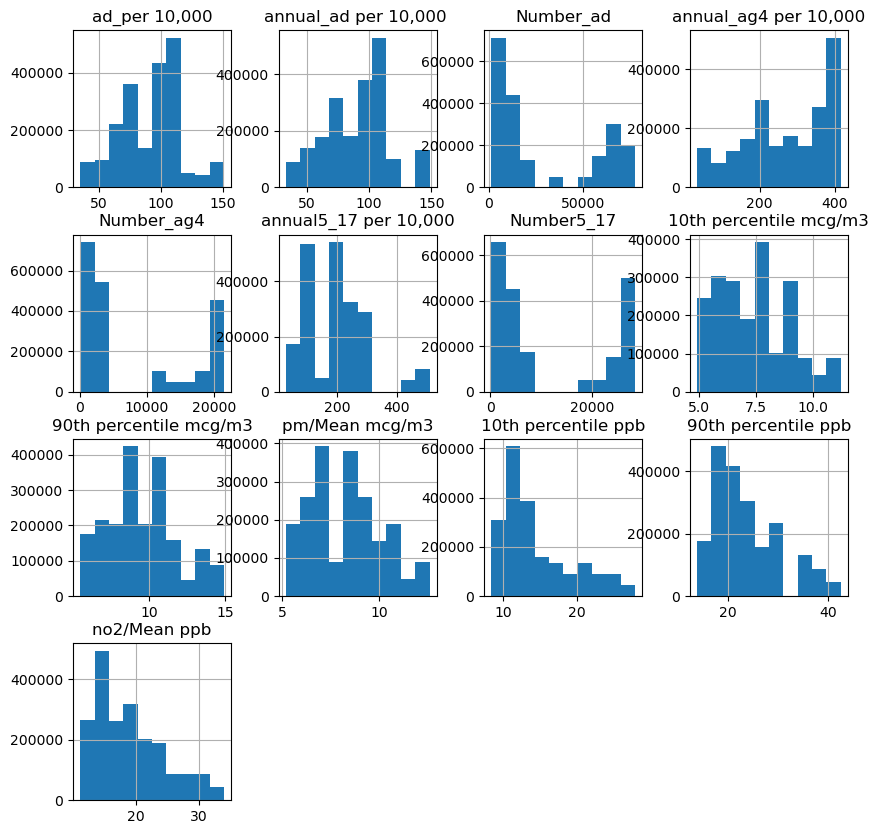

In [10]:
# Making a histogram for each variable in df
axes= df_subset.hist(bins=10,figsize=(10,10))

Based on the plots two histograms(NO2 and 10 percentile of PM2.5) show a right-skewed distribution (long tail on the right side). This indicates that while most of the data points cluster on the lower end, there are a few exceptionally high values.


**1.5.Explore data relationships** 

In this section we can call the .corr() method on our data to look at all the correlations between our variables.

In [11]:
# Call the .corr() method on the dataset 
df_subset.corr()

,"ad_per 10,000","annual_ad per 10,000",Number_ad,"annual_ag4 per 10,000",Number_ag4,"annual5_17 per 10,000",Number5_17,10th percentile mcg/m3,90th percentile mcg/m3,pm/Mean mcg/m3,10th percentile ppb,90th percentile ppb,no2/Mean ppb
"ad_per 10,000",1.000000,0.998201,0.461498,0.435276,0.296647,0.455683,0.324062,0.166720,0.340884,0.253640,0.415073,0.437583,0.461633
"annual_ad per 10,000",0.998201,1.000000,0.490541,0.434782,0.325072,0.438847,0.352146,0.152351,0.322934,0.238050,0.385812,0.414759,0.438705
Number_ad,0.461498,0.490541,1.000000,0.428772,0.853514,0.130418,0.874465,-0.112507,-0.006944,-0.048769,-0.152981,-0.004692,0.017509
"annual_ag4 per 10,000",0.435276,0.434782,0.428772,1.000000,0.610129,0.444121,0.433635,0.138347,0.316487,0.228917,0.363589,0.406902,0.432650
Number_ag4,0.296647,0.325072,0.853514,0.610129,1.000000,0.085988,0.890691,-0.138565,-0.046574,-0.080924,-0.210078,-0.055306,-0.034513
"annual5_17 per 10,000",0.455683,0.438847,0.130418,0.444121,0.085988,1.000000,0.239877,0.276941,0.480122,0.374074,0.640409,0.614690,0.639804
Number5_17,0.324062,0.352146,0.874465,0.433635,0.890691,0.239877,1.000000,-0.127340,-0.023812,-0.063950,-0.182239,-0.026090,-0.003711
10th percentile mcg/m3,0.166720,0.152351,-0.112507,0.138347,-0.138565,0.276941,-0.127340,1.000000,0.936437,0.984712,0.365005,0.319842,0.328104
90th percentile mcg/m3,0.340884,0.322934,-0.006944,0.316487,-0.046574,0.480122,-0.023812,0.936437,1.000000,0.981549,0.564321,0.521761,0.539944
pm/Mean mcg/m3,0.253640,0.238050,-0.048769,0.228917,-0.080924,0.374074,-0.063950,0.984712,0.981549,1.000000,0.455459,0.414062,0.427339


 Plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

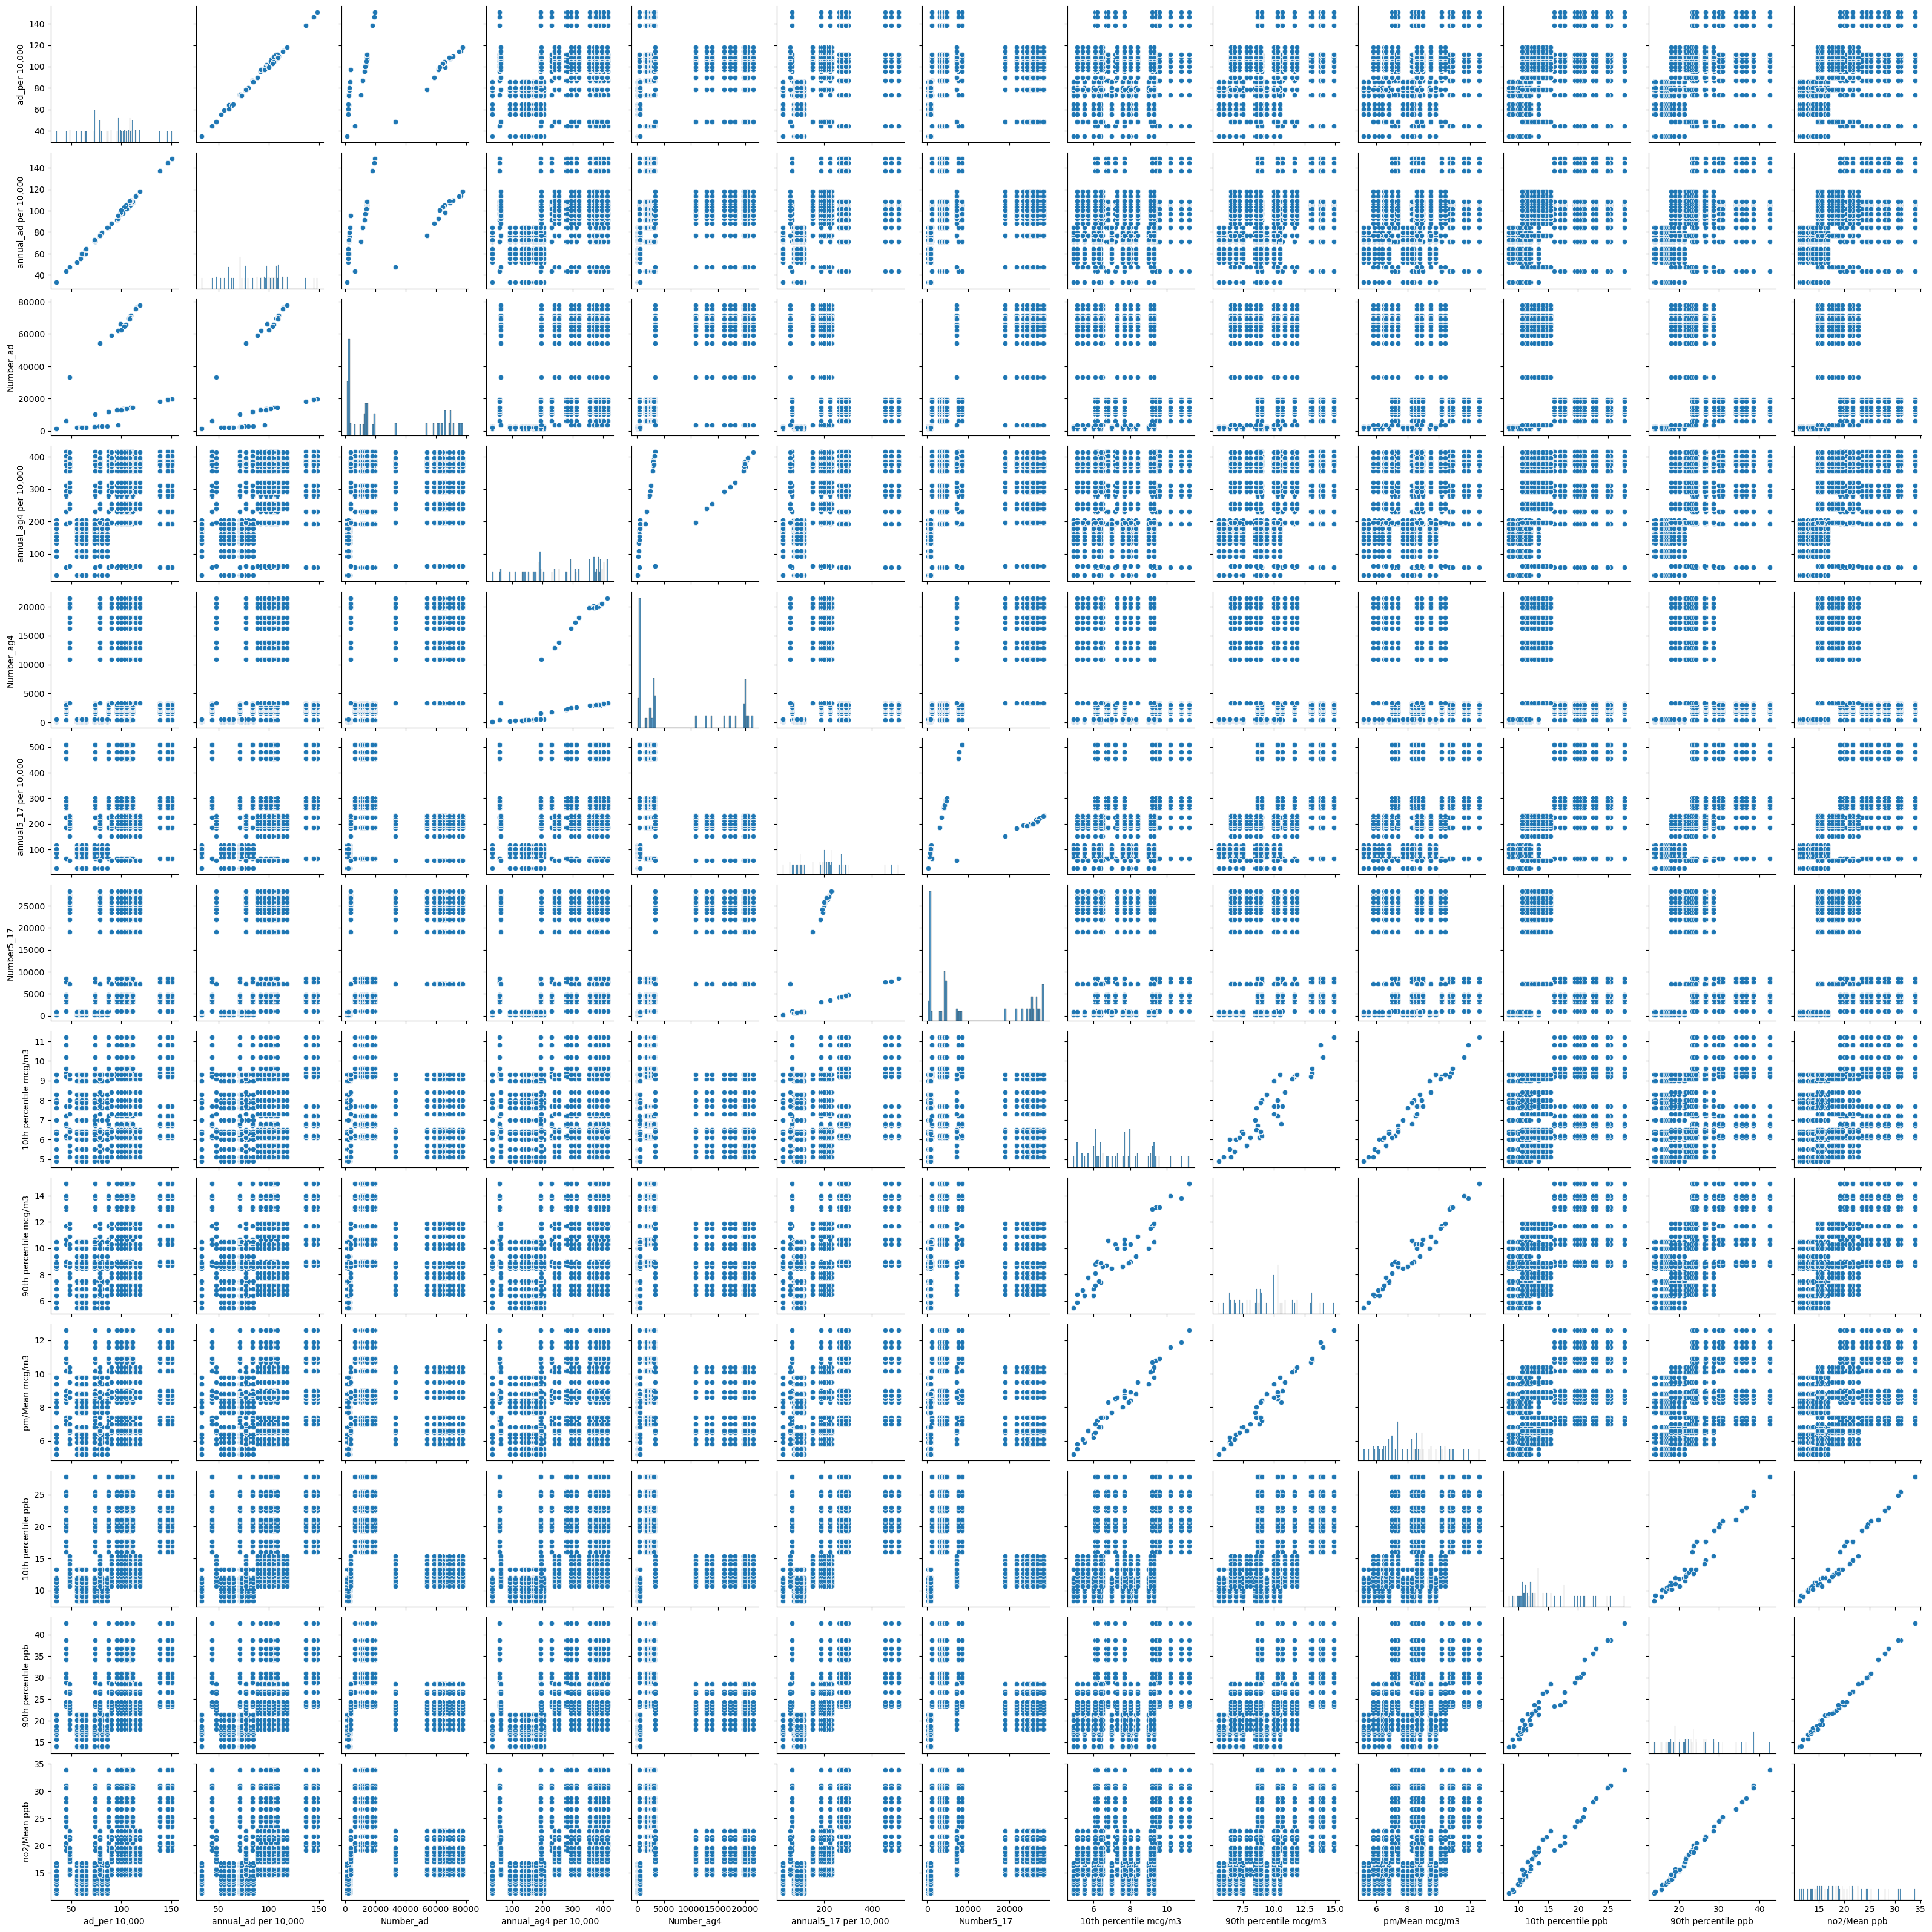

In [ ]:
sns.pairplot(df_subset)

**1.5.1.Visualize Relationships Between Variables**

<Axes: >

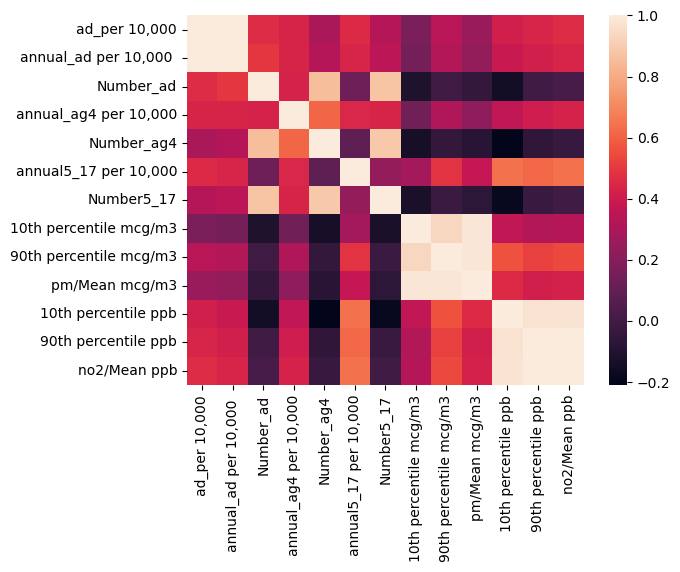

In [12]:
# Make a heatmap of the data 
sns.heatmap(df_subset.corr())

<Axes: xlabel='Number_ad'>

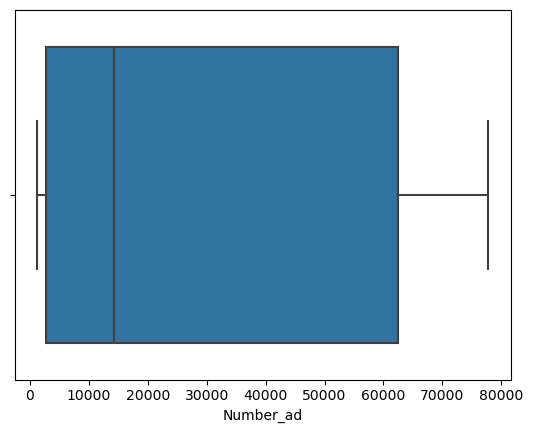

In [14]:
#Make a box plots of features

sns.boxplot(x=df['Number_ad'])

<Axes: xlabel='Number_ag4'>

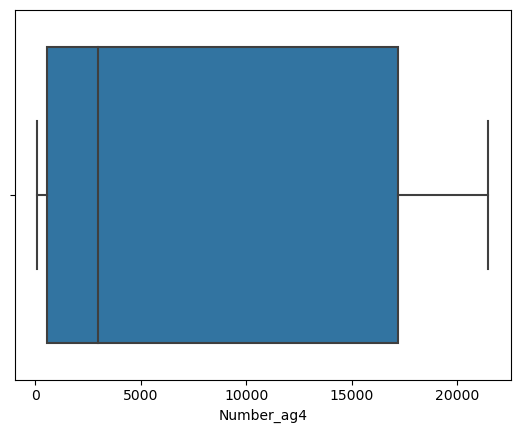

In [15]:
sns.boxplot(x=df['Number_ag4'])

<Axes: xlabel='Number5_17'>

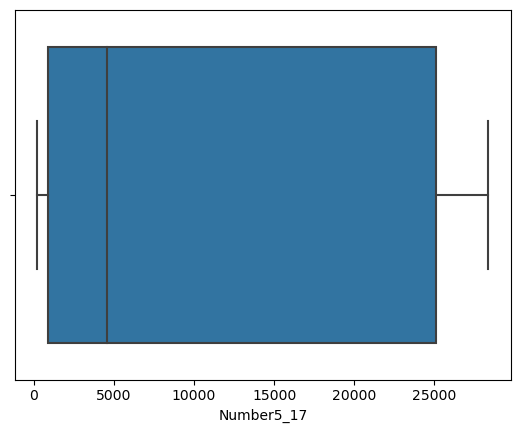

In [16]:
sns.boxplot(x=df['Number5_17'])

<Axes: xlabel='pm/Mean mcg/m3'>

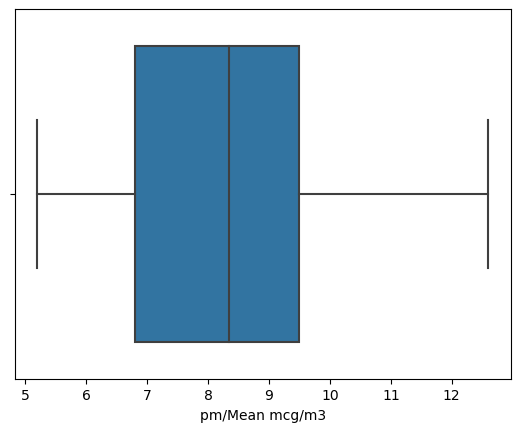

In [17]:
sns.boxplot(x=df['pm/Mean mcg/m3'])

<Axes: xlabel='no2/Mean ppb'>

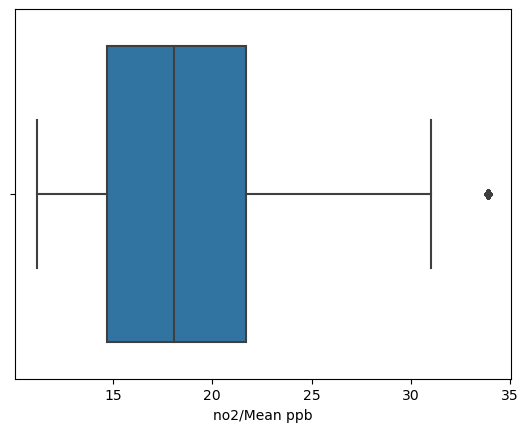

In [18]:
sns.boxplot(x=df['no2/Mean ppb'])